In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('Competition_data.csv')

In [5]:
### 
train.head()

,Date,Close
0,1/1/2023 23:58:00,448.08
1,1/2/2023 23:58:00,448.08
2,1/3/2023 23:58:00,448.55
3,1/4/2023 23:58:00,449.01
4,1/5/2023 23:58:00,449.53


In [6]:
### The shape of the data
train.shape

(486, 2)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    486 non-null    object 
 1   Close   486 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


In [8]:
### Remove time
train['Date'] = train['Date'].apply(lambda x:x.split(' ')[0])

In [9]:
### Convert 
train['Date'] = pd.to_datetime(train['Date'])

In [10]:
train

,Date,Close
0,2023-01-01,448.08
1,2023-01-02,448.08
2,2023-01-03,448.55
3,2023-01-04,449.01
4,2023-01-05,449.53
...,...,...
481,2024-05-02,1372.95
482,2024-05-03,1382.50
483,2024-05-04,1382.50
484,2024-05-05,1393.74


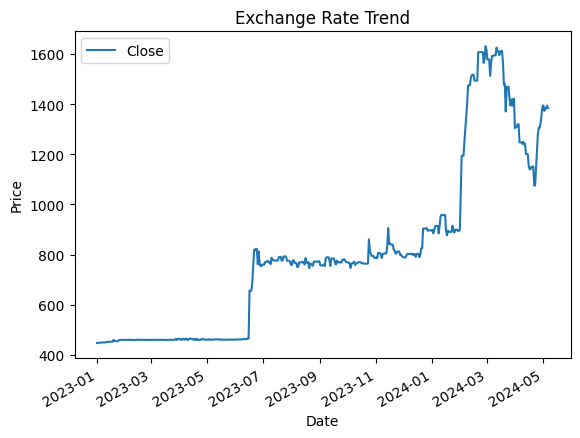

In [11]:
train.set_index('Date').plot(title='Exchange Rate Trend');
plt.ylabel('Price');

Recently, the distribution of exchange prices has not been stable.

### Create our test set

In [12]:
### The test set ranges from May 22 to June 4th
date_range = pd.date_range(start='2024-05-22', end='2024-06-04', freq='D')

In [13]:
test = pd.DataFrame(date_range, columns=['Date'])

In [14]:
test

,Date
0,2024-05-22
1,2024-05-23
2,2024-05-24
3,2024-05-25
4,2024-05-26
5,2024-05-27
6,2024-05-28
7,2024-05-29
8,2024-05-30
9,2024-05-31


The test set ranges from May 22 to June 4th 2024.

### Forecasting model

ARIMA models are a popular tool for time series forecasting, and can be implemented in Python using the `statsmodels` library.

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [16]:
### Cross validation
train_data = train[:480] ## we use the date from January 1 2023 to April 30 2024 to train our model
valid_data = train[480:] ## we use the date May 1 to May 6 to validate the performance of our model

In [17]:
train_close = train_data['Close'] ## Our target feature (Close)
valid_close = valid_data['Close']

In [18]:
historical_close = [x for x in train_close]

In [19]:
model = ARIMA(historical_close, order=(1,1,1))

In [20]:
model_fit = model.fit()

c:\Users\LENOVO\Music\Ad-Engagement-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\LENOVO\Music\Ad-Engagement-Forecasting\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [21]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  480
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2266.694
Date:                Sat, 25 May 2024   AIC                           4539.388
Time:                        11:46:44   BIC                           4551.903
Sample:                             0   HQIC                          4544.308
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9643      0.014    -66.538      0.000      -0.993      -0.936
ma.L1          0.9997      0.114      8.790      0.000       0.777       1.223
sigma2       751.2418     93.678      8.019      0.0

In [22]:
y_pred = model_fit.predict(start=len(train_data), end=len(train)-1)

In [23]:
mean_squared_error(valid_close, y_pred.round(2), squared=False)

8.882015537027629

Validation score is 8.88

### Test prediction

In [24]:
test['Date'].iloc[0]

Timestamp('2024-05-22 00:00:00')

In [25]:
start_date = test['Date'].iloc[0]
end_date = test['Date'].iloc[-1]
prediction_dates = pd.date_range(start=start_date, end=end_date, freq='D')

In [26]:
periods = len(prediction_dates)

# Forecast
forecast = model_fit.get_forecast(steps=periods)

In [27]:
predicted_mean = forecast.predicted_mean

In [28]:
predicted_mean

array([1389.26842887, 1389.97389697, 1389.29360052, 1389.94962346,
       1389.31700793, 1389.92705124, 1389.33877475, 1389.90606108,
       1389.35901597, 1389.88654208, 1389.37783852, 1389.86839114,
       1389.39534182, 1389.85151237])

#### Make Submission (Make sure you round to 2 demical places)

In [29]:
submission = test

In [30]:
submission['Close'] = predicted_mean.round(2)

In [31]:
submission

,Date,Close
0,2024-05-22,1389.27
1,2024-05-23,1389.97
2,2024-05-24,1389.29
3,2024-05-25,1389.95
4,2024-05-26,1389.32
5,2024-05-27,1389.93
6,2024-05-28,1389.34
7,2024-05-29,1389.91
8,2024-05-30,1389.36
9,2024-05-31,1389.89


In [32]:
## Submit to Zindi
submission.to_csv('base1.csv',index=False)

### Recommendation

* Data cleaning (if any).

* Find the optimal parameters for the ARIMA model.

* Try more sophisticated models like SARIMAX and FProphet.

* Try the machine learning approach.

* Ensemble Method.

### Best of Luck in your Forecast